In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
from compute_costs import compute_costs

In [3]:
df1 = pd.read_csv("sim_data_f6f2b8f4-dc32-ed11-a9fc-b88303911bc1.csv")
df2 = pd.read_csv("sim_data_bf038501-a7d0-ec11-a9f8-b88303911bc1.csv")
df = pd.concat([df1,df2], ignore_index=True)

df_scenarios = pd.read_csv("../../run_sims/Assets/scenario_master_list.csv")

df_full = pd.merge(df, df_scenarios, how="left", on=["archetype", "scenario_number"])
compute_costs(df_full)

C:\Users\joshsu\Code\malaria-sac-ipt\analysis\220831\compute_costs.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IPTsc_drug_unit_cost"][df["drug_type"]=="ASAQ"] = cost_dict["ASAQ"]
C:\Users\joshsu\Code\malaria-sac-ipt\analysis\220831\compute_costs.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IPTsc_drug_unit_cost"][df["drug_type"]=="SPAQ"] = cost_dict["SPAQ"]
C:\Users\joshsu\Code\malaria-sac-ipt\analysis\220831\compute_costs.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [12]:
m = df_full.groupby(["archetype", "scenario_number", "baseline_eir"]).agg("mean").reset_index()
s = df_full.groupby(["archetype", "scenario_number", "baseline_eir"]).agg("std").reset_index()
foo = pd.merge(m,s,on=["archetype", "scenario_number", "baseline_eir"], suffixes=("_MEAN", "_STDEV"))

In [13]:
np.mean(m["pop6_15"]/5)

238.38624919053578

In [14]:
scenarios_of_interest = [30, 1, 4, 13, 16] # No-intervention and all IPT variations 

In [15]:
list(foo.columns)

['archetype',
 'scenario_number',
 'baseline_eir',
 'iptsc_rdts_used_MEAN',
 'iptsc_drugs_used_MEAN',
 'cases_treated_MEAN',
 'severe_cases_treated_MEAN',
 'received_smc_MEAN',
 'received_ivermectin_MEAN',
 'received_primaquine_MEAN',
 'pfpr0_5_MEAN',
 'pfpr2_10_MEAN',
 'pfpr6_15_MEAN',
 'pfpr16_500_MEAN',
 'pfpr_all_MEAN',
 'clinical_incidence0_5_MEAN',
 'clinical_incidence2_10_MEAN',
 'clinical_incidence6_15_MEAN',
 'clinical_incidence16_500_MEAN',
 'clinical_incidence_all_MEAN',
 'severe_incidence0_5_MEAN',
 'severe_incidence2_10_MEAN',
 'severe_incidence6_15_MEAN',
 'severe_incidence16_500_MEAN',
 'severe_incidence_all_MEAN',
 'pop0_5_MEAN',
 'pop2_10_MEAN',
 'pop6_15_MEAN',
 'pop16_500_MEAN',
 'pop_all_MEAN',
 'avg_age_MEAN',
 'avg_age_clinical_cases_MEAN',
 'avg_age_severe_cases_MEAN',
 'Run_Number_MEAN',
 'hs_rate_MEAN',
 'within_school_coverage_MEAN',
 'out_of_school_rate_MEAN',
 'smc_on_MEAN',
 'ivermectin_MEAN',
 'primaquine_MEAN',
 'IPTsc_drug_unit_cost_MEAN',
 'num_IPTsc_ca

In [33]:
foo_to_plot = foo[np.in1d(foo["scenario_number"], scenarios_of_interest)].reset_index(drop=True)
foo_to_plot = foo_to_plot[foo_to_plot["archetype"]=="Central"].reset_index(drop=True)
foo_to_plot = foo_to_plot[["scenario_number", "baseline_eir",
                           "cost_mean_MEAN", "cost_mean_STDEV"]]
foo_to_plot["scenario_label"] = foo_to_plot["scenario_number"].apply(lambda x: str(x))

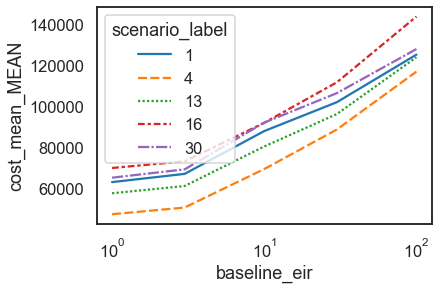

In [34]:
sns.lineplot(data=foo_to_plot, x="baseline_eir", y="cost_mean_MEAN", hue="scenario_label", style="scenario_label")
plt.xscale("log")
# plt.yscale("log")

In [20]:
foo_to_plot

,scenario_number,baseline_eir,cost_mean_MEAN,cost_mean_STDEV
0,1,1,24805.29400,4653.709179
1,1,3,43122.78100,1421.529529
2,1,10,58673.48800,846.107803
3,1,30,76958.70900,1637.462886
4,1,100,94718.87500,1743.933682
5,4,1,30954.52375,2346.904928
6,4,3,40057.60150,1522.548187
7,4,10,52459.21325,2403.137646
8,4,30,69465.91725,2084.797641
9,4,100,86391.41500,1617.354928


(0.0, 27000.0)

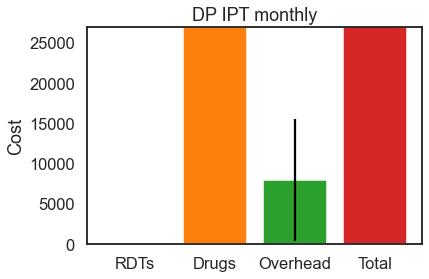

In [11]:
index = np.arange(4)

for s, sdf in foo_to_plot.groupby("scenario_number"):
    if s==16:
        ii = 0
        for cost_type in ["rdt", "drugs", "overhead", "total"]:
            if cost_type == "rdt":
                y = sdf["cost_IPTsc_RDTs_MEAN"].iloc[0]
                yerr = sdf["cost_IPTsc_RDTs_STDEV"].iloc[0]
            elif cost_type == "drugs":
                y = sdf["cost_IPTsc_drugs_MEAN"].iloc[0]
                yerr = sdf["cost_IPTsc_drugs_STDEV"].iloc[0]
            elif cost_type == "overhead":
                y = sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]
                yerr_overhead = 0.5*(sdf["IPTsc_overhead_cost_high_MEAN"].iloc[0]-sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]) + 0.5*(sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]-sdf["IPTsc_overhead_cost_low_MEAN"].iloc[0])
                yerr_stochastic = sdf["IPTsc_overhead_cost_mean_STDEV"].iloc[0]
                yerr = np.sqrt(yerr_overhead**2 + yerr_stochastic**2)
            elif cost_type == "total":
                y = sdf["cost_IPTsc_RDTs_MEAN"].iloc[0] + sdf["cost_IPTsc_drugs_MEAN"].iloc[0] + sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]
                yerr = sdf["cost_IPTsc_RDTs_STDEV"].iloc[0] + sdf["cost_IPTsc_drugs_STDEV"].iloc[0] + 0.5*(sdf["IPTsc_overhead_cost_high_MEAN"].iloc[0]-sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]) + 0.5*(sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]-sdf["IPTsc_overhead_cost_low_MEAN"].iloc[0]) + sdf["IPTsc_overhead_cost_mean_STDEV"].iloc[0]
            #     y = sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]
            plt.bar(x=ii,height=y, yerr=yerr)
            ii += 1

ax = plt.gca()
# ax.set_xticks(index, labels=test['cost_type'], rotation=90)
ax.set_xticks(index, labels=["RDTs", "Drugs", "Overhead", "Total"])
plt.ylabel("Cost")
plt.title("DP IPT monthly")
plt.ylim([0,27000])

In [12]:
sdf

,scenario_number,cost_IPTsc_RDTs_MEAN,cost_IPTsc_RDTs_STDEV,cost_IPTsc_drugs_MEAN,cost_IPTsc_drugs_STDEV,IPTsc_overhead_cost_low_MEAN,IPTsc_overhead_cost_high_MEAN,IPTsc_overhead_cost_mean_MEAN,IPTsc_overhead_cost_low_STDEV,IPTsc_overhead_cost_high_STDEV,IPTsc_overhead_cost_mean_STDEV
3,16,0.0,0.0,44968.7616,1150.806113,472.8024,15549.9456,8011.374,12.099597,397.942301,205.020949


meta NOT subset; don't know how to subset; dropped


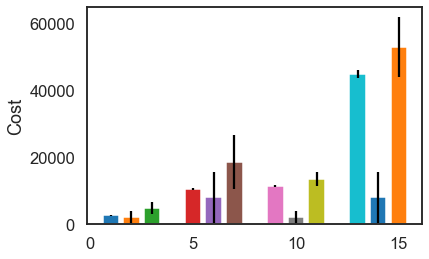

In [18]:
index = np.arange(8)

ii = 0
for s, sdf in foo_to_plot.groupby("scenario_number"):
    # if s==7:
    ii += 1
    for cost_type in ["drugs", "overhead", "total"]:
    # for cost_type in ["rdt", "drugs", "overhead", "total"]:
    #     if cost_type == "rdt":
    #         y = sdf["cost_IPTsc_RDTs_MEAN"].iloc[0]
    #         yerr = sdf["cost_IPTsc_RDTs_STDEV"].iloc[0]
        if cost_type == "drugs":
            y = sdf["cost_IPTsc_drugs_MEAN"].iloc[0]
            yerr = sdf["cost_IPTsc_drugs_STDEV"].iloc[0]
        elif cost_type == "overhead":
            y = sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]
            yerr_overhead = 0.5*(sdf["IPTsc_overhead_cost_high_MEAN"].iloc[0]-sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]) + 0.5*(sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]-sdf["IPTsc_overhead_cost_low_MEAN"].iloc[0])
            yerr_stochastic = sdf["IPTsc_overhead_cost_mean_STDEV"].iloc[0]
            yerr = np.sqrt(yerr_overhead**2 + yerr_stochastic**2)
        elif cost_type == "total":
            y = sdf["cost_IPTsc_RDTs_MEAN"].iloc[0] + sdf["cost_IPTsc_drugs_MEAN"].iloc[0] + sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]
            yerr = sdf["cost_IPTsc_RDTs_STDEV"].iloc[0] + sdf["cost_IPTsc_drugs_STDEV"].iloc[0] + 0.5*(sdf["IPTsc_overhead_cost_high_MEAN"].iloc[0]-sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]) + 0.5*(sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]-sdf["IPTsc_overhead_cost_low_MEAN"].iloc[0]) + sdf["IPTsc_overhead_cost_mean_STDEV"].iloc[0]
        #     y = sdf["IPTsc_overhead_cost_mean_MEAN"].iloc[0]
        plt.bar(x=ii,height=y, yerr=yerr)
        ii += 1

ax = plt.gca()
# ax.set_xticks(index, labels=test['cost_type'], rotation=90)
# ax.set_xticks(index, labels=["RDTs", "Drugs", "Overhead", "Total", "RDTs", "Drugs", "Overhead", "Total"])
plt.ylabel("Cost")
# plt.title("ASAQ IST term")
# plt.ylim([0,27000])
plt.savefig("commodity_costs_rough.pdf")

In [ ]:
# Put in form of scenario_number, cost_type, mean, err

In [26]:
foo_to_plot

,scenario_number,cost_IPTsc_RDTs_MEAN,cost_IPTsc_RDTs_STDEV
0,7,2644.28,60.643954
1,16,0.00,0.000000


In [24]:
list(foo_to_plot.columns)

['archetype',
 'scenario_number',
 'iptsc_rdts_used_MEAN',
 'iptsc_drugs_used_MEAN',
 'cases_treated_MEAN',
 'severe_cases_treated_MEAN',
 'received_smc_MEAN',
 'received_ivermectin_MEAN',
 'received_primaquine_MEAN',
 'pfpr0_5_MEAN',
 'pfpr2_10_MEAN',
 'pfpr6_15_MEAN',
 'pfpr16_500_MEAN',
 'pfpr_all_MEAN',
 'clinical_incidence0_5_MEAN',
 'clinical_incidence2_10_MEAN',
 'clinical_incidence6_15_MEAN',
 'clinical_incidence16_500_MEAN',
 'clinical_incidence_all_MEAN',
 'severe_incidence0_5_MEAN',
 'severe_incidence2_10_MEAN',
 'severe_incidence6_15_MEAN',
 'severe_incidence16_500_MEAN',
 'severe_incidence_all_MEAN',
 'pop0_5_MEAN',
 'pop2_10_MEAN',
 'pop6_15_MEAN',
 'pop16_500_MEAN',
 'pop_all_MEAN',
 'avg_age_MEAN',
 'avg_age_clinical_cases_MEAN',
 'avg_age_severe_cases_MEAN',
 'baseline_eir_MEAN',
 'Run_Number_MEAN',
 'hs_rate_MEAN',
 'within_school_coverage_MEAN',
 'out_of_school_rate_MEAN',
 'smc_on_MEAN',
 'ivermectin_MEAN',
 'primaquine_MEAN',
 'IPTsc_drug_unit_cost_MEAN',
 'num_IPT